In [1]:
# MODIFY! 
# use Robust! 
model_name = 'poi-baseline-wo'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./data/d-wo-ns.csv')

In [4]:
# df.columns

In [5]:
# df.head()

In [6]:
df.shape

(2142, 87)

In [7]:
# df.info()

In [8]:
X = df.drop('throughput',axis=1)

In [9]:
X.shape

(2142, 86)

In [10]:
y = df['throughput']

In [11]:
y.shape

(2142,)

In [12]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate model
from sklearn.linear_model import PoissonRegressor
model = PoissonRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [13]:
model

PoissonRegressor()

In [14]:
mae

4.533693109008443

In [15]:
mse

32.14353855749357

In [16]:
rmse

5.669527189942171

In [17]:
err_df = pd.DataFrame(data=[mae, mse, rmse],index=['MAE','MSE','RMSE'],columns=[f'{model_name}'])
err_df

,poi-baseline-wo
MAE,4.533693
MSE,32.143539
RMSE,5.669527


In [18]:
err_df.to_csv(f'./baseline-err/{model_name}.csv')

In [19]:
y_pred_df = pd.DataFrame(y_pred, columns=['throughput_pred'])
y_pred_df.describe().drop('count')
# no negative predictions

,throughput_pred
mean,18.164829
std,7.056004
min,0.223440
25%,13.097196
50%,16.546537
75%,22.799049
max,42.291370


<AxesSubplot:ylabel='Count'>

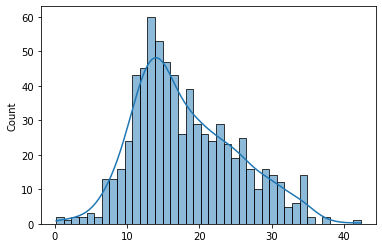

In [20]:
sns.histplot(y_pred,bins=40,kde=True)
# the distribution better reflects the true distribution of the data set

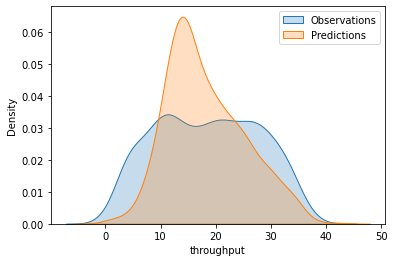

In [21]:
fig,ax = plt.subplots()

sns.kdeplot(y_test, ax=ax, shade=True, label='Observations')
sns.kdeplot(y_pred, ax=ax,shade=True,label='Predictions')

ax.legend(loc='best')

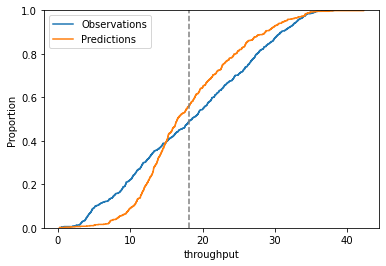

In [22]:
fig,ax = plt.subplots()

sns.ecdfplot(y_test, ax=ax, label='Observations')
sns.ecdfplot(y_pred, ax=ax,label='Predictions')
plt.axvline(x=y.mean(),color='grey',linestyle='--')

ax.legend(loc='best')

In [23]:
# y.describe().drop(['count'])

In [24]:
res = y_test - y_pred
res.describe().drop('count')

mean     0.278877
std      5.666673
min    -15.419281
25%     -3.456941
50%      0.311321
75%      4.187008
max     16.727716
Name: throughput, dtype: float64

<AxesSubplot:xlabel='throughput', ylabel='Count'>

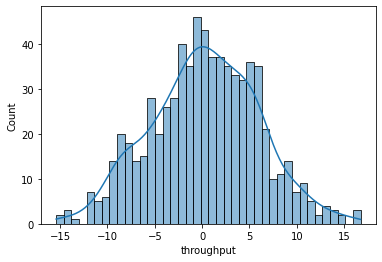

In [25]:
sns.histplot(data=res, kde=True,bins=40)

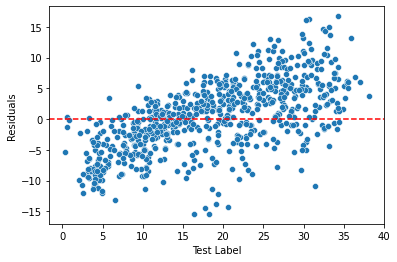

In [26]:
ax = sns.scatterplot(x=y_test, y=res)
ax.set(ylabel='Residuals', xlabel='Test Label')
plt.axhline(y=0,color='red',linestyle='--')

# there should be no clear pattern / curve in the plot
# we see a positive correlation between Test Label and Residuals -> later models should avoid this pattern

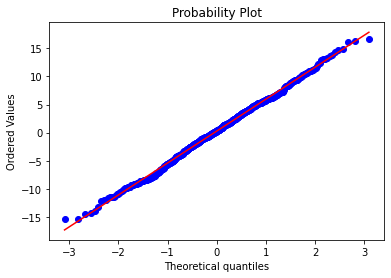

In [27]:
import scipy as sp

fig, ax = plt.subplots()
sp.stats.probplot(res,plot=ax);

In [28]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X_poisson = scaler.transform(X)

poisson_model = PoissonRegressor()
poisson_model.fit(X_poisson,y)

PoissonRegressor()

In [29]:
model.coef_

array([ 0.01874152,  0.01237476, -0.004848  , -0.02588143,  0.00848569,
        0.01517793, -0.0111622 ,  0.16503539,  0.03711252,  0.03293776,
        0.01631444, -0.03875804,  0.2750015 , -0.08836026,  0.07249228,
       -0.00063792,  0.01707851,  0.0082706 , -0.01298756, -0.01002745,
       -0.01976441,  0.00037441, -0.01112303, -0.00585305, -0.01368685,
       -0.00268133,  0.00104797,  0.011751  ,  0.00869633, -0.03095145,
       -0.00372278,  0.00981883,  0.        ,  0.01539417,  0.00090907,
        0.00139016,  0.01956457, -0.03904476, -0.02321979, -0.01847287,
        0.00110459,  0.01798174,  0.00737518, -0.00669968,  0.00049988,
       -0.01267556, -0.04763683,  0.007625  ,  0.01632639, -0.00927219,
       -0.0553318 , -0.01236748, -0.0243245 ,  0.00223246, -0.0376079 ,
        0.02537285,  0.01451152, -0.02354731, -0.01236954, -0.00091973,
        0.00592592, -0.0097385 ,  0.03089199,  0.00083845,  0.        ,
       -0.01613418,  0.02188786, -0.00051376,  0.01776686, -0.01

In [30]:
# coef_df = pd.DataFrame(data=model.coef_,index=X.columns,columns=['beta'])
# coef_df

In [31]:
poisson_model.coef_

array([ 1.53936279e-02,  1.12958381e-02, -1.00614598e-02, -1.37970731e-02,
        8.84353982e-03,  1.49109145e-02, -1.59894584e-02,  1.64878779e-01,
        3.84498798e-02,  4.13513613e-02,  9.74793728e-03, -4.29705599e-02,
        2.80690642e-01, -9.65785444e-02,  7.90093963e-02, -1.10130742e-02,
        1.77761774e-02,  5.01845153e-03, -6.46334701e-03, -8.37088115e-03,
       -1.44501151e-02,  1.37843509e-03, -9.81760878e-03, -6.71734048e-03,
        3.92766037e-05,  7.55050787e-03,  6.27213973e-03,  9.96863310e-03,
        1.10721035e-02, -1.55531210e-02,  3.87204187e-03,  9.47350378e-03,
       -1.34092234e-02,  1.24828469e-02, -3.61936153e-03,  4.78842492e-03,
        2.13790415e-02, -3.44295394e-02, -4.23874886e-02, -2.40268703e-02,
        9.82101636e-03,  1.44750710e-02,  8.00177654e-03, -3.31509083e-03,
        5.17861430e-06, -9.99662330e-03, -3.90871729e-02,  1.46087533e-03,
        1.69056846e-02, -8.98516888e-03, -5.04393921e-02, -9.73818051e-03,
       -1.95585143e-02,  

In [32]:
# coef_df = pd.DataFrame(data=poisson_model.coef_,index=X.columns,columns=['beta'])
# coef_df

In [33]:
delta_df = pd.DataFrame(data=poisson_model.coef_ - model.coef_,index=X.columns,columns=['delta_beta'])
delta_df

,delta_beta
distance,-0.003348
lat,-0.001079
lon,-0.005213
alt,0.012084
speed,0.000358
...,...
region_urban,-0.006559
weekday_Monday,0.000360
weekday_Thursday,-0.000985
weekday_Tuesday,0.001758


In [34]:
pd.set_option('display.max_columns',None)
delta_df.sort_values('delta_beta').sort_values('delta_beta').transpose()

,ci_27771905,ci_27770886,region_highway,hour,rtt,ci_28371202,cqi,region_urban,ci_33837570,ci_28367105,ci_30422273,ci_27771906,lon,ci_33527552,ci_33527561,dir,ci_27770889,ta,ci_27771908,distance,ci_26378498,ci_27770888,ci_28371201,ci_29401601,ci_27256324,ci_28371200,lat,weekday_Thursday,ci_26385410,ci_29391104,ci_29568770,ci_33519104,ci_28365057,ci_27770885,acc,rsrp,ci_28368384,ci_29568769,speed,weekday_Monday,ci_29913344,ci_28367106,ci_27771909,ci_26378497,ci_33527559,ci_29913346,ci_26385408,ci_26385409,region_suburban,rsrq,ci_29391106,ci_29391105,ci_26378755,weekday_Tuesday,ci_27771140,ci_29563904,ci_27256325,ci_29568768,ci_28368642,ci_28365058,ci_29913345,ci_28365056,ci_27771139,ci_31263232,ci_29908736,ci_27771904,ci_28368651,ci_28368386,ci_27029251,ci_26379013,ci_29398276,payload,ci_31281409,ci_30492930,txPower,ci_26378754,ci_33527554,ci_27770883,sinr,ci_28365063,ci_27771907,weekday_Wednesday,ci_26796291,alt,ci_26796290,ci_27299332
delta_beta,-0.019168,-0.013409,-0.010685,-0.010375,-0.008218,-0.006792,-0.006567,-0.006559,-0.006348,-0.006164,-0.005909,-0.005554,-0.005213,-0.005121,-0.005072,-0.004827,-0.004528,-0.004213,-0.003507,-0.003348,-0.003252,-0.002911,-0.002609,-0.00189,-0.001782,-0.001227,-0.001079,-0.000985,-0.000864,-0.000642,-0.000581,-0.000581,-0.000495,-0.000345,-0.000267,-0.000157,0.000287,0.000357,0.000358,0.00036,0.000368,0.000579,0.000627,0.000698,0.000768,0.000942,0.001004,0.001305,0.001336,0.001337,0.001473,0.001549,0.001657,0.001758,0.001814,0.002049,0.002376,0.002452,0.002629,0.002679,0.003265,0.003385,0.003398,0.003457,0.004514,0.004615,0.004766,0.004892,0.005224,0.005314,0.005405,0.005689,0.006117,0.006433,0.006517,0.006524,0.007569,0.007595,0.008414,0.00855,0.008716,0.009255,0.010232,0.012084,0.013726,0.015398


<AxesSubplot:ylabel='Count'>

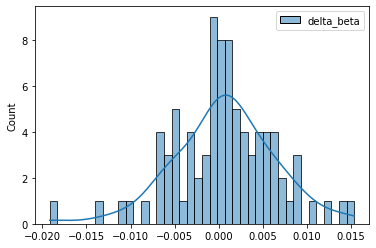

In [35]:
sns.histplot(data=delta_df,bins=40,kde=True)

In [36]:
y_pred_poisson = poisson_model.predict(X_poisson)

<AxesSubplot:ylabel='Count'>

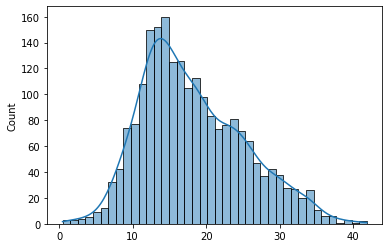

In [37]:
sns.histplot(y_pred_poisson,bins=40,kde=True)

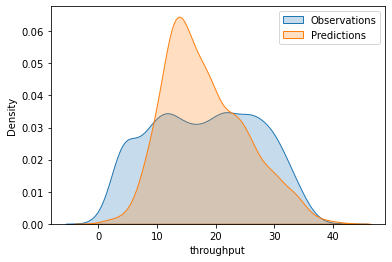

In [38]:
fig,ax = plt.subplots()

sns.kdeplot(y, ax=ax, shade=True, label='Observations')
sns.kdeplot(y_pred_poisson, ax=ax,shade=True,label='Predictions')

ax.legend(loc='best')

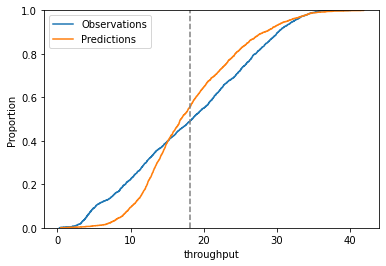

In [39]:
fig,ax = plt.subplots()

sns.ecdfplot(y, ax=ax, label='Observations')
sns.ecdfplot(y_pred_poisson, ax=ax,label='Predictions')
plt.axvline(x=y.mean(),color='grey',linestyle='--')

ax.legend(loc='best')

In [40]:
mae = mean_absolute_error(y,y_pred_poisson)
mse = mean_squared_error(y,y_pred_poisson)
rmse = np.sqrt(mse)

In [41]:
err_df = pd.DataFrame(data=[mae, mse, rmse],index=['MAE','MSE','RMSE'],columns=['PR'])
err_df

,PR
MAE,4.414181
MSE,29.744203
RMSE,5.453825


In [42]:
# err_df.to_csv('./model-err/poi-model-err.csv')

In [43]:
from joblib import dump, load
dump(poisson_model, f'./baseline-models/{model_name}.joblib')

['./baseline-models/poi-baseline-wo.joblib']

DONE!